### 비트코인 가격 예측

**\*참고**  
**처음으로 0에 수렴하는 시차 이후에 상관이 크게 줄어드는 지점이 적절한 차분 횟수이다.**  
**하지만 일반적인 기준점이므로 실제와 다를 수는 있기 때문에 여러 차분을 시도하여 결정해야 한다.**

In [5]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [6]:
from datetime import datetime

def change_date(millis):
    timestamp = millis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

bitcoin_df.loc[:, 'x'] = bitcoin_df.x.apply(change_date)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [7]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [10]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0+ KB


In [11]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2009-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1410 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


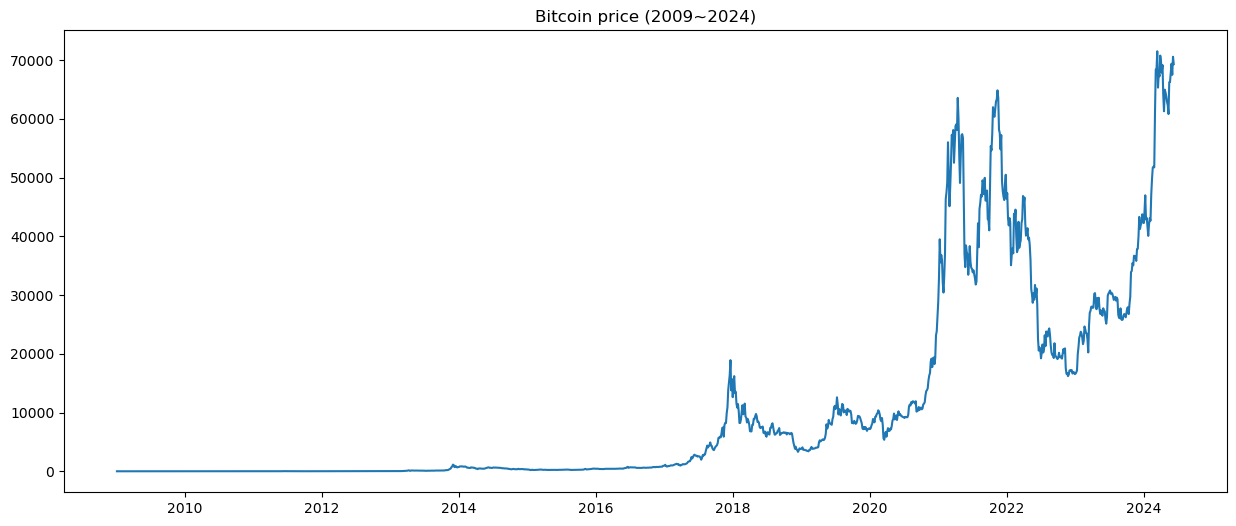

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(bitcoin_df)
plt.title('Bitcoin price (2009~2024)')
plt.show()

In [13]:
bitcoin_df.diff()

,y
x,
2009-01-03,NaN
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,1676.16
2024-05-28,1431.94
2024-06-01,-1889.24


In [14]:
bitcoin_df.pct_change()

,y
x,
2009-01-03,NaN
2009-01-07,NaN
2009-01-11,NaN
2009-01-15,NaN
2009-01-19,NaN
...,...
2024-05-24,0.025294
2024-05-28,0.021076
2024-06-01,-0.027233


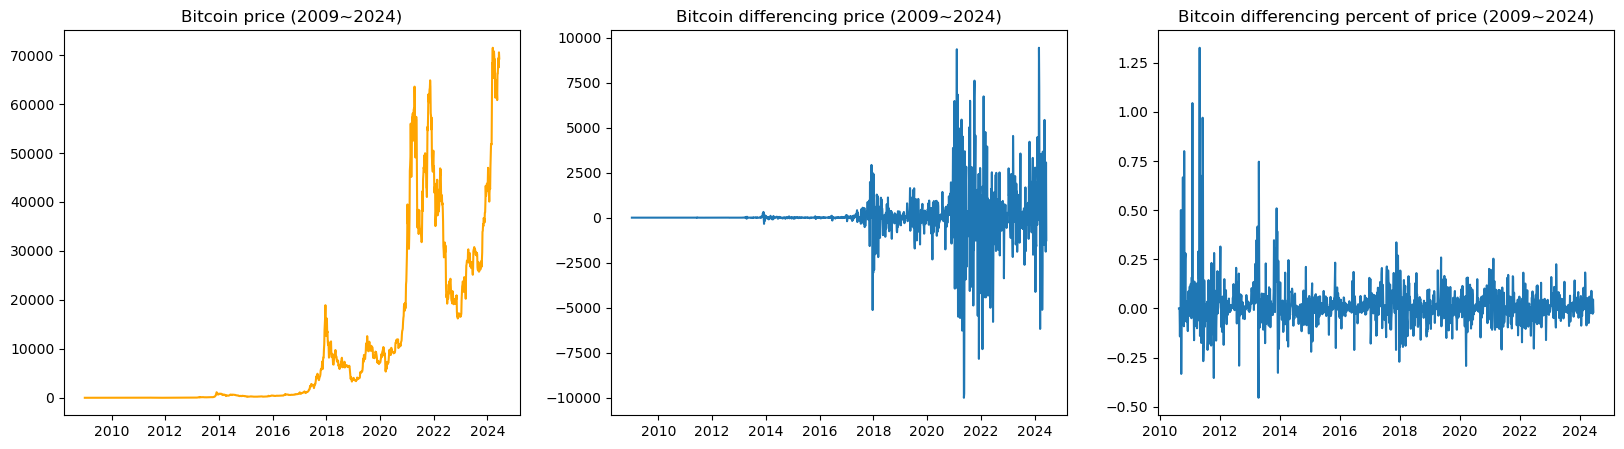

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(bitcoin_df, c='orange')
plt.title('Bitcoin price (2009~2024)')

plt.subplot(1, 3, 2)
plt.plot(bitcoin_df.diff())
plt.title('Bitcoin differencing price (2009~2024)')

plt.subplot(1, 3, 3)
plt.plot(bitcoin_df.pct_change())
plt.title('Bitcoin differencing percent of price (2009~2024)')

plt.show()

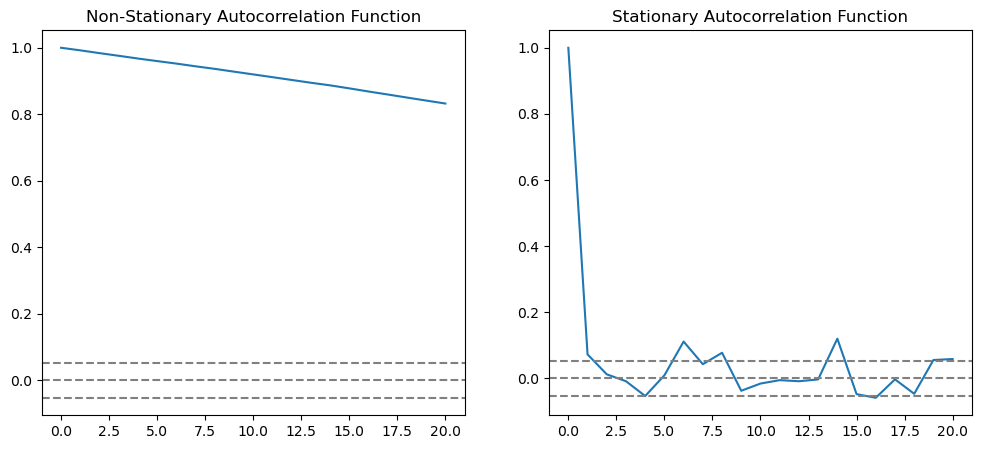

In [16]:
import numpy as np
from statsmodels.tsa.stattools import acf

bitcoin_df.dropna(inplace=True)
bitcoin_df_diff = bitcoin_df.diff().dropna()

bitcoin_df_acf = acf(bitcoin_df, nlags=20)
bitcoin_df_diff_acf = acf(bitcoin_df_diff, nlags=20)

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.plot(bitcoin_df_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(bitcoin_df)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(bitcoin_df)), linestyle='--', color='gray')
plt.title('Non-Stationary Autocorrelation Function')

plt.subplot(122)
plt.plot(bitcoin_df_diff_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(bitcoin_df_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(bitcoin_df_diff)), linestyle='--', color='gray')
plt.title('Stationary Autocorrelation Function')

plt.show()

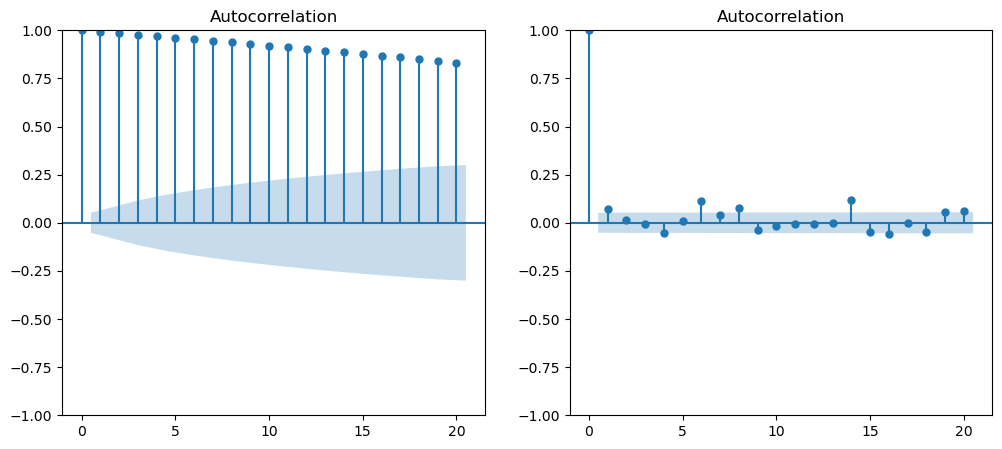

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(bitcoin_df, lags=20, ax=ax[0])
plot_acf(bitcoin_df_diff, lags=20, ax=ax[1])
plt.show()

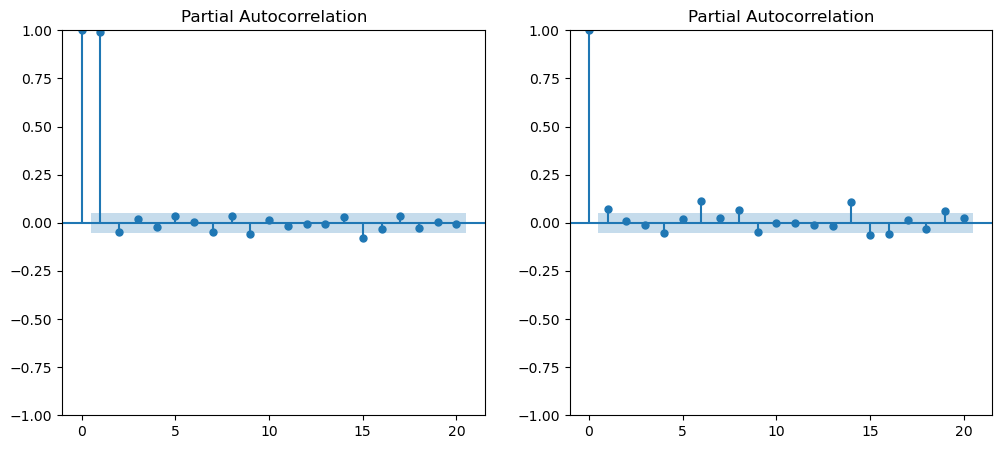

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_pacf(bitcoin_df, lags=20, ax=ax[0])
plot_pacf(bitcoin_df_diff, lags=20, ax=ax[1])
plt.show()

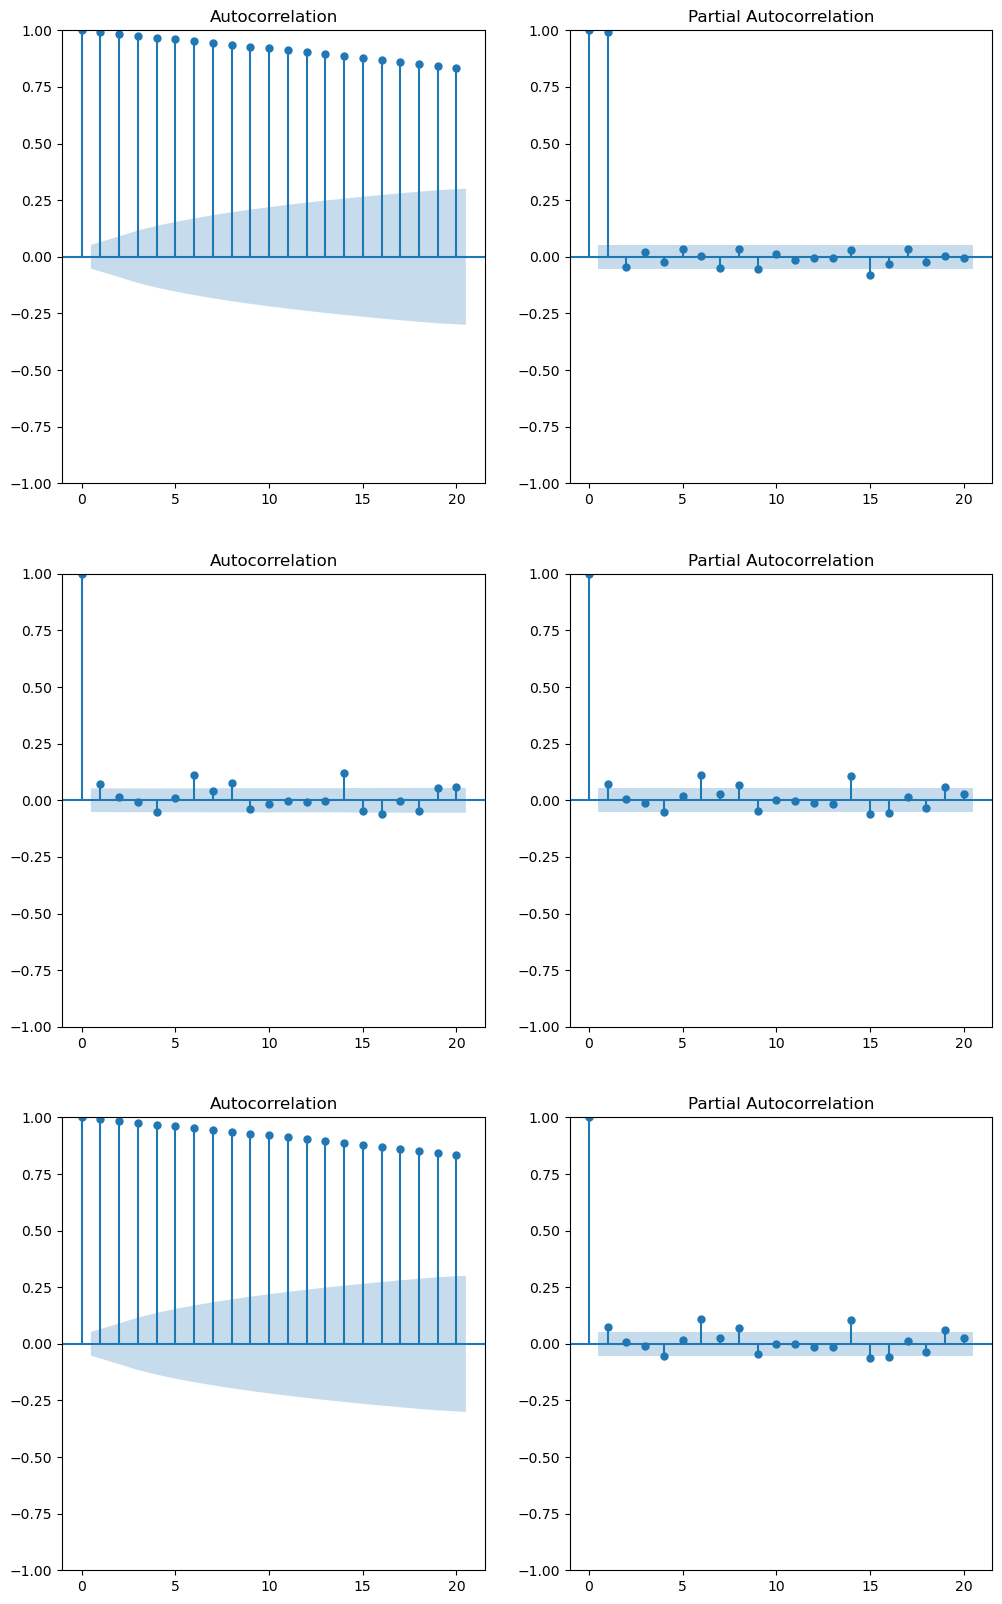

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(12, 20))

ax = ax.flatten()
plot_acf(bitcoin_df, lags=20, ax=ax[0])
plot_pacf(bitcoin_df, lags=20, ax=ax[1])

plot_acf(bitcoin_df.diff().dropna(), lags=20, ax=ax[2])
plot_pacf(bitcoin_df.diff().dropna(), lags=20, ax=ax[3])

plot_acf(bitcoin_df, lags=20, ax=ax[4])
plot_pacf(bitcoin_df.diff().dropna(), lags=20, ax=ax[5])

plt.show()

In [32]:
window_size = 20
moving_avg = bitcoin_df.rolling(window_size).mean()
print(moving_avg)

moving_avg_diff = bitcoin_df_diff.diff().diff().rolling(window_size).mean()
print(moving_avg_diff)

                     y
x                     
2009-01-03         NaN
2009-01-07         NaN
2009-01-11         NaN
2009-01-15         NaN
2009-01-19         NaN
...                ...
2024-05-24  66133.4685
2024-05-28  66186.8320
2024-06-01  65986.6175
2024-06-05  66249.0960
2024-06-09  66321.1335

[1410 rows x 1 columns]
                   y
x                   
2009-01-07       NaN
2009-01-11       NaN
2009-01-15       NaN
2009-01-19       NaN
2009-01-23       NaN
...              ...
2024-05-24  194.4385
2024-05-28  351.5865
2024-06-01 -328.7135
2024-06-05  716.2710
2024-06-09 -653.1340

[1409 rows x 1 columns]


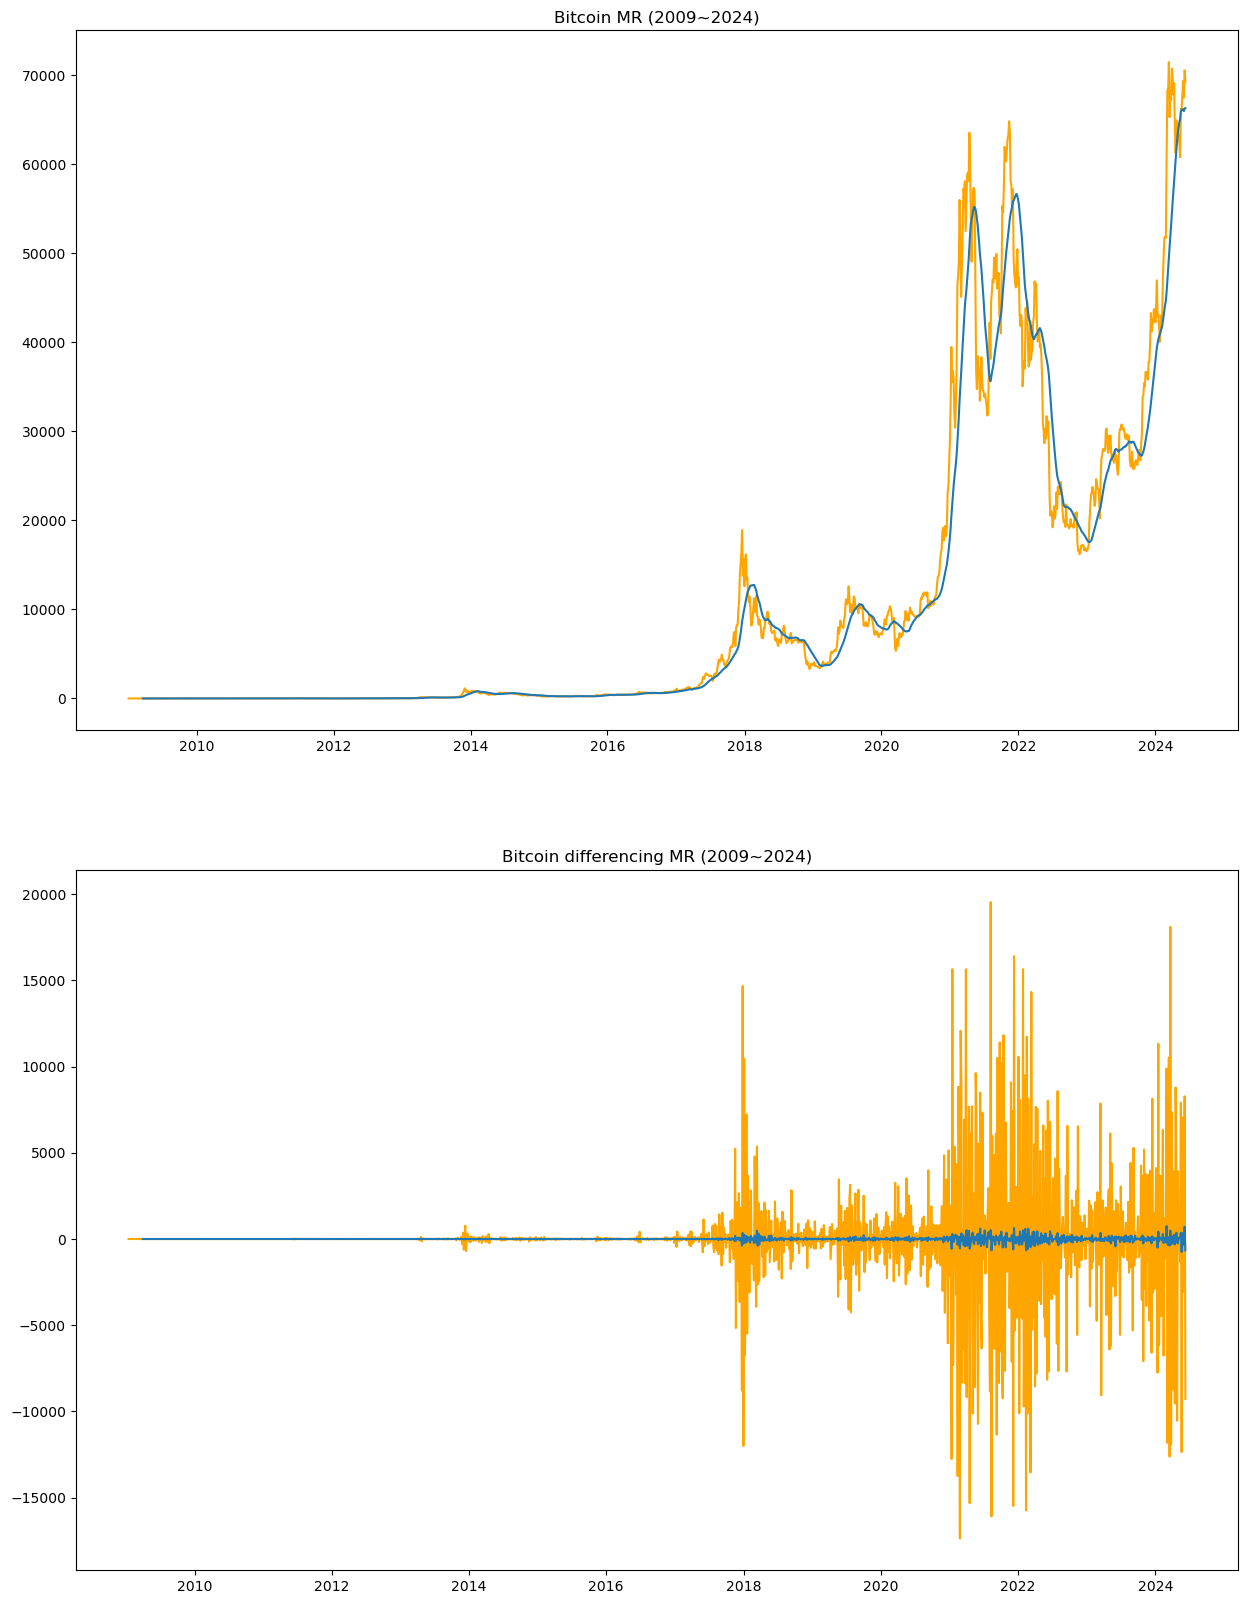

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
plt.plot(bitcoin_df, c='orange')
    
plt.subplot(2, 1, 1)
plt.plot(moving_avg)

plt.title('Bitcoin MR (2009~2024)')

plt.subplot(2, 1, 2)
plt.plot(bitcoin_df_diff.diff().diff(), c='orange')
    
plt.subplot(2, 1, 2)
plt.plot(moving_avg_diff)

plt.title('Bitcoin differencing MR (2009~2024)')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 4D will be used.
  self._init_dates(dates, freq)


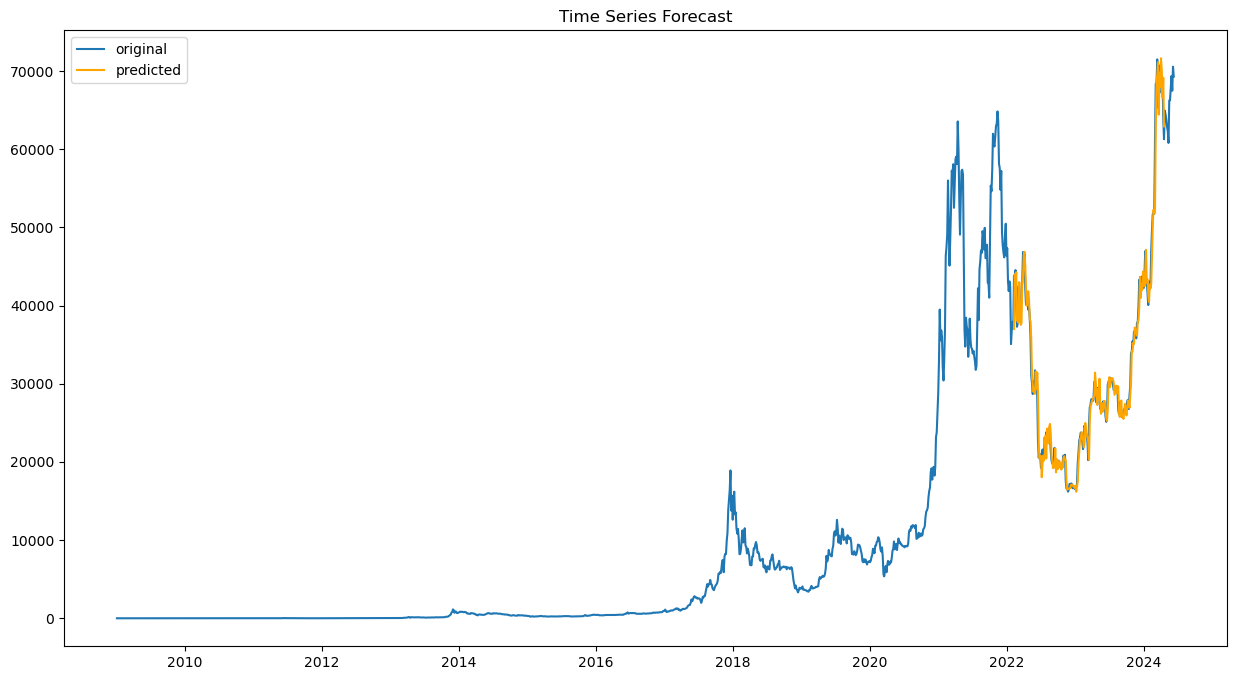

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(bitcoin_df, order=(1, 1, 21))
model_fit = model.fit()

start_index = pd.to_datetime('2022-02-08')
end_index = pd.to_datetime('2024-04-18')
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(15, 8))
plt.plot(bitcoin_df, label='original')
plt.plot(forecast, label='predicted', c='orange')
plt.title("Time Series Forecast")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(bitcoin_df['2022-02-08':'2024-04-18'], forecast)
print("Mean Squared Error", mse)

msle = mean_squared_log_error(bitcoin_df['2022-02-08':'2024-04-18'], forecast)
print("Mean Squared Log Error", msle)

Mean Squared Error 3936526.9365164037
Mean Squared Log Error 0.003447934763322742
